The reason for the weather forecasting is to guide the company through in the procurement arrangement. Some goods category sell more in high temperature while some sell less. With the information on how high or low the temperature will be, they will have the right information on the category of goods to purchase. 

In [1]:
# Setup

# common:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set some display options:
sns.set(style="whitegrid")

# load data
wt = pd.read_csv("DWeather.csv")

In [2]:
wt.head()

,Date,Temperature (° F) - Avg,Dew Point (° F) - Avg,Humidity (%) - Avg,Wind Speed (mph) - Avg,Pressure (Hg) - Avg,Precipitation (in) Total,Year,Quarter,Month,Day
0,2016-01-01,40.7,24.0,51.7,14.4,30.0,0.0,2016,1,1,1
1,2016-02-01,37.3,18.5,46.8,13.3,30.0,0.0,2016,1,2,1
2,2016-03-01,41.0,23.2,50.3,14.3,29.9,0.0,2016,1,3,1
3,2016-04-01,29.3,10.3,45.7,19.3,30.0,0.0,2016,2,4,1
4,2016-05-01,20.7,-2.2,38.5,13.2,30.6,0.0,2016,2,5,1


In [3]:
wt.dtypes

Date                         object
Temperature (° F) - Avg     float64
Dew Point (° F) - Avg       float64
Humidity (%) - Avg          float64
Wind Speed (mph) - Avg      float64
Pressure (Hg) - Avg         float64
Precipitation (in) Total    float64
Year                          int64
Quarter                       int64
Month                         int64
Day                           int64
dtype: object

In [4]:
wt['Date']= pd.to_datetime(wt['Date'])
wt.dtypes

Date                        datetime64[ns]
Temperature (° F) - Avg            float64
Dew Point (° F) - Avg              float64
Humidity (%) - Avg                 float64
Wind Speed (mph) - Avg             float64
Pressure (Hg) - Avg                float64
Precipitation (in) Total           float64
Year                                 int64
Quarter                              int64
Month                                int64
Day                                  int64
dtype: object

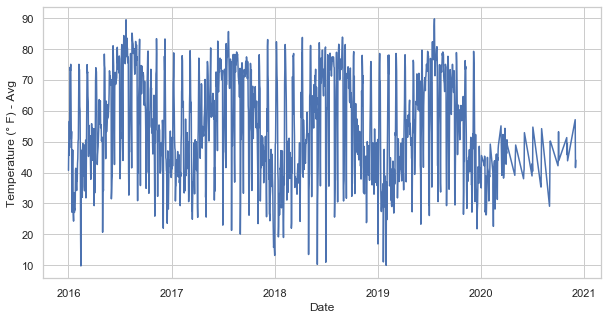

In [5]:
#to visualize trend for temperature
figsize = (10, 5)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(ax=ax, x='Date', y="Temperature (° F) - Avg", data=wt)

In [6]:
wt["Temperature (° F) - Avg"].describe()

count    1563.000000
mean       54.512860
std        16.411441
min         9.800000
25%        41.300000
50%        53.000000
75%        70.000000
max        89.700000
Name: Temperature (° F) - Avg, dtype: float64

In [7]:
# to check for outliers in the temperature values

df_temp = wt["Temperature (° F) - Avg"].copy()
Q1 = df_temp.quantile(0.25)
Q3 = df_temp.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1- 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print(Q1)
print(Q3)

lower bound is -1.750000000000007
upper bound is 113.05000000000001
41.3
70.0


## Forecasting

In [8]:
from fbprophet import Prophet

In [9]:
df = pd.DataFrame(columns=['ds', 'y'], data=wt[["Date","Temperature (° F) - Avg"]].values)
df

,ds,y
0,2016-01-01,40.7
1,2016-02-01,37.3
2,2016-03-01,41
3,2016-04-01,29.3
4,2016-05-01,20.7
...,...,...
1558,2020-07-04,54.7
1559,2020-08-04,54.2
1560,2020-09-04,50.2
1561,2020-10-04,43.9


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


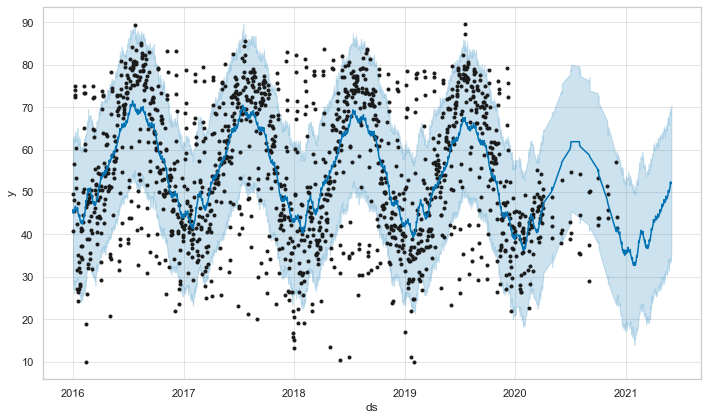

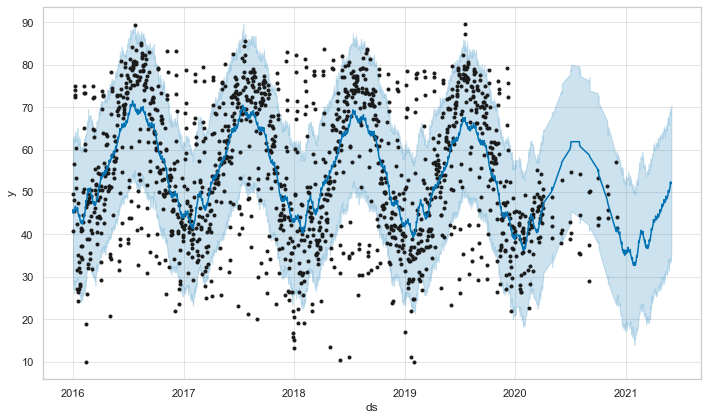

In [10]:
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods = 180)
forecast = m.predict(future)
m.plot(forecast)

In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1738,2021-05-28,51.231363,34.062463,70.065168
1739,2021-05-29,52.377237,35.305732,69.799161
1740,2021-05-30,51.898304,33.732467,68.951506
1741,2021-05-31,52.125221,33.682657,70.258562
1742,2021-06-01,52.251130,34.442599,68.172119


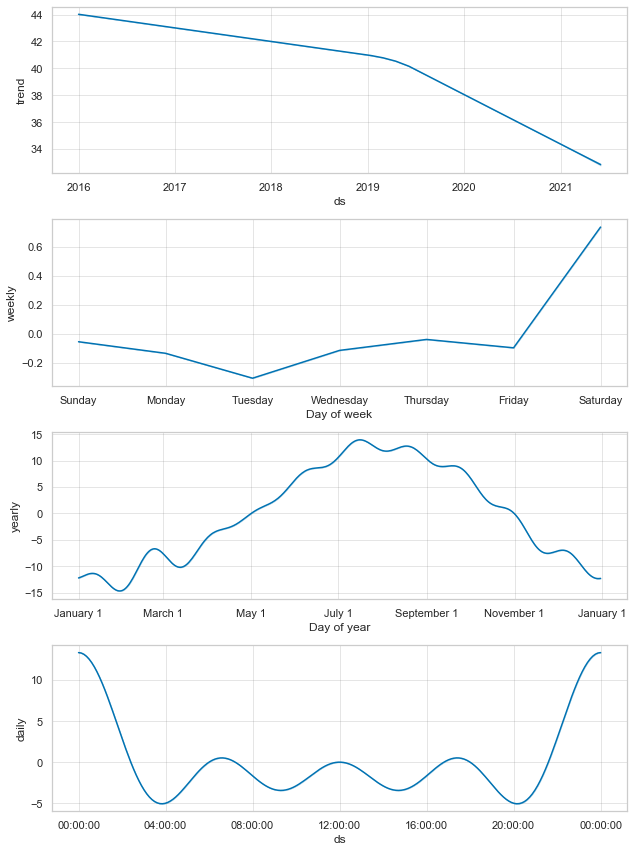

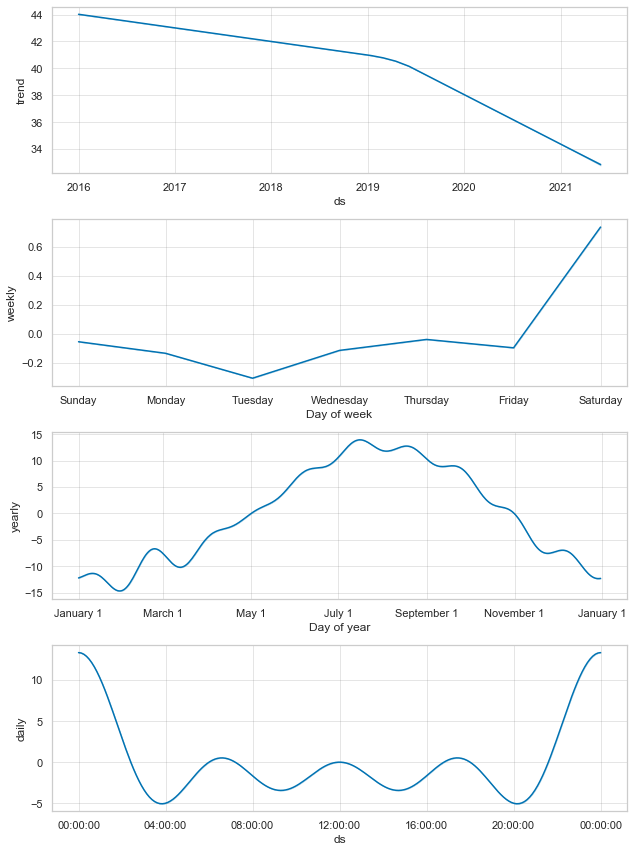

In [12]:
m.plot_components(forecast)

### To check the accuray of the model using Mean Absolute Percentage Error

In [13]:
df1=df[(df.ds <= "2019-01-01")] #train data
df2=df[(df.ds > "2019-01-01")] #test data   

In [14]:
df2

,ds,y
1097,2019-02-01,37
1098,2019-03-01,41
1099,2019-04-01,39.9
1100,2019-05-01,44.6
1101,2019-06-01,42.3
...,...,...
1558,2020-07-04,54.7
1559,2020-08-04,54.2
1560,2020-09-04,50.2
1561,2020-10-04,43.9


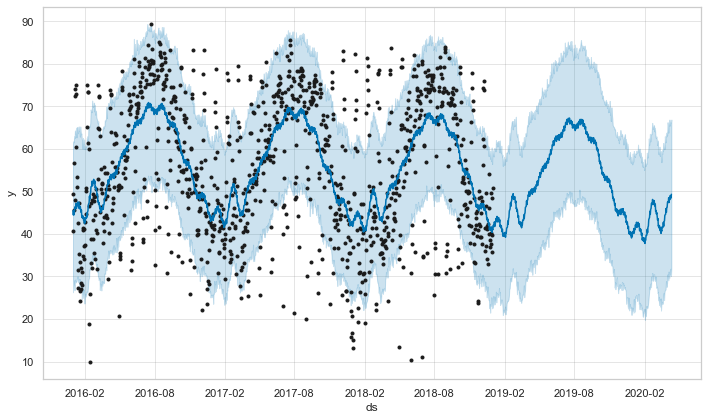

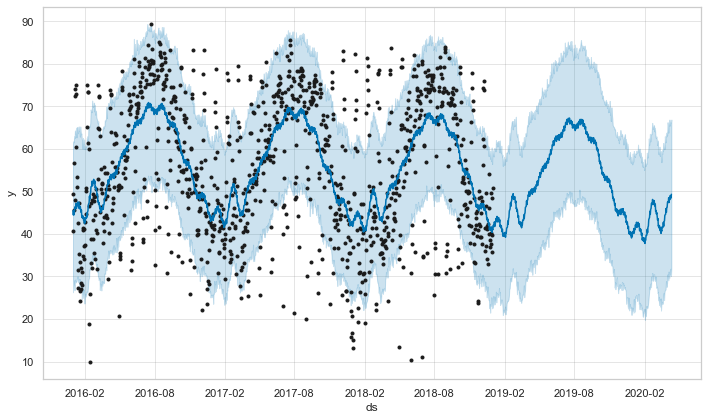

In [15]:
m = Prophet(daily_seasonality=True)
m.fit(df1)
future = m.make_future_dataframe(periods = len(df2))
forecast = m.predict(future)
m.plot(forecast)

In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1558,2020-04-07,48.039887,30.483717,65.444223
1559,2020-04-08,49.001448,30.361783,66.406476
1560,2020-04-09,48.701381,31.824219,66.302493
1561,2020-04-10,48.406912,30.071826,66.214356
1562,2020-04-11,49.305598,32.043217,66.852314


In [17]:
test=pd.merge(df2,forecast,on="ds",how="inner")

In [18]:
tested = test[['ds', 'y', 'yhat']]
tested 

,ds,y,yhat
0,2019-02-01,37,39.410731
1,2019-03-01,41,47.307728
2,2019-04-01,39.9,47.947272
3,2019-05-01,44.6,53.445920
4,2019-06-01,42.3,59.751021
...,...,...,...
430,2020-03-31,42.7,46.262053
431,2020-01-04,45.5,41.262340
432,2020-02-04,49.2,38.492678
433,2020-03-04,48.9,44.994745


In [19]:
#to set date as the index
testing = tested.set_index('ds')

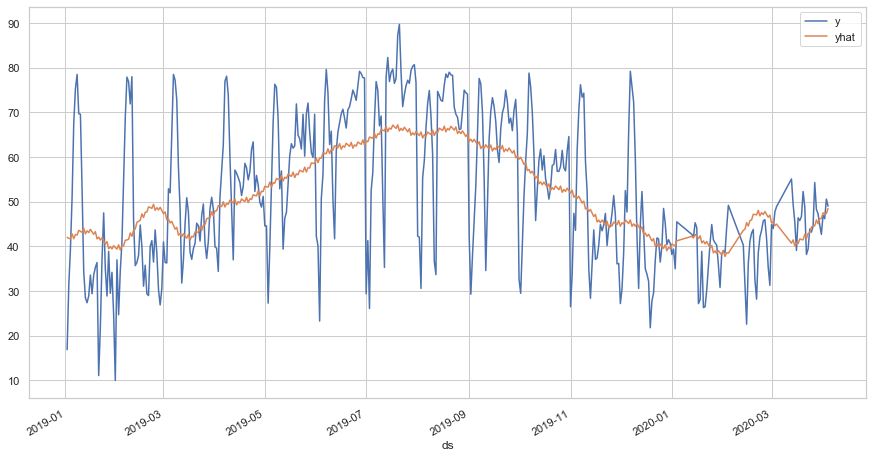

In [20]:
#to visualize the trend of actual(y) and predicted(yhat) values
testing.plot(figsize = (15, 8))

In [21]:
def MAPE(y, yhat):
    '''to calculate the mean absolute percentage error'''
    return np.mean(np.abs((y-yhat)/y)) * 100

In [22]:
mape = MAPE(testing['y'], testing['yhat'])

In [23]:
mape

22.51735685256264